# Know your customers

One of the most common applications of KMeans is to get to know your customers. Take a very simple dataset that is Mall Customers to try to discover customer segmentations.

0. Import usuals librairies

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


1. Import the ```Mall_Customers.csv``` dataset

In [ ]:
dataset = pd.read_csv("https://full-stack-bigdata-datasets.s3.eu-west-3.amazonaws.com/Machine+Learning+non+Supervis%C3%A9/KMeans/Exercices/Datasets/Mall_Customers.csv")
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


2. Remove the "CustomerID" variable from your dataset. 

In [ ]:
dataset.drop('CustomerID', axis=1, inplace=True)

3. Dummy your categorical variables 

In [ ]:
dummied_variable = pd.get_dummies(dataset['Genre'], drop_first=True)
numerical_variable = dataset.loc[:,dataset.columns != "Genre"]

sc = StandardScaler()
numerical_variable = sc.fit_transform(numerical_variable)

X = pd.DataFrame(numerical_variable, columns=dataset.columns[1:])
X['male'] = dummied_variable

In [ ]:
X.describe()

,Age,Annual Income (k$),Spending Score (1-100),male
count,2.000000e+02,2.000000e+02,2.000000e+02,200.000000
mean,-9.603429e-17,-6.128431e-16,-1.121325e-16,0.440000
std,1.002509e+00,1.002509e+00,1.002509e+00,0.497633
min,-1.496335e+00,-1.738999e+00,-1.910021e+00,0.000000
25%,-7.248436e-01,-7.275093e-01,-5.997931e-01,0.000000
50%,-2.045351e-01,3.587926e-02,-7.764312e-03,0.000000
75%,7.284319e-01,6.656748e-01,8.851316e-01,1.000000
max,2.235532e+00,2.917671e+00,1.894492e+00,1.000000


4. We are going to build our clusters, but to do so, we need to know the optimum number of clusters we need. First use the ```Elbow``` method to see if we can see how many we need to take as a value for ```k```.

In [ ]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init="k-means++", random_state=0)
    kmeans.fit(X)
    wcss.append([i, kmeans.inertia_])

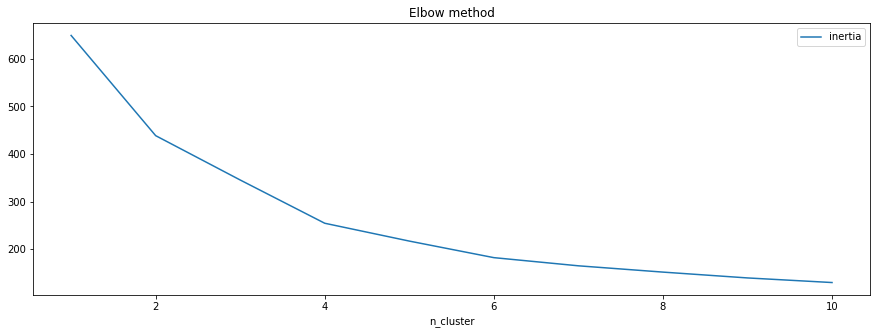

In [ ]:
title = 'Elbow method'
pd.DataFrame(wcss, columns=['n_cluster', 'inertia']).set_index('n_cluster').plot(figsize=(15,5), title=title);

In [ ]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init="k-means++", random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

In [ ]:
# Create a DataFrame that will be fed to plotly 
wcss_frame = pd.DataFrame(wcss)

# Using Plotly to visualize elbow 
import plotly.express as px 

# Creating a line plot
fig = px.line(wcss_frame, x=wcss_frame.index, y=wcss_frame.iloc[:, -1])

# Creating layouts 
fig.update_layout(
    title="Inertia per clusters",
    xaxis_title="# clusters",
    yaxis_title="Inertia"
)

# Render in notebook
fig.show()


---> Difficult to see something but we could imagine 4 or 5 clusters would be ideal

5. Then use the _Silhouette_ method to see if we can refine our hypothesis for ```k```.

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
silhouette_score(X, kmeans.predict(X))

0.33691716194989146

In [ ]:
kmeans.predict(X)

array([2, 4, 2, 4, 2, 4, 2, 4, 6, 4, 6, 4, 6, 4, 2, 4, 2, 4, 6, 4, 2, 4,
       6, 4, 6, 4, 2, 4, 2, 4, 6, 4, 6, 4, 6, 4, 2, 4, 2, 4, 7, 4, 1, 9,
       1, 9, 1, 9, 9, 9, 1, 9, 9, 7, 1, 1, 1, 7, 9, 1, 7, 9, 7, 1, 7, 9,
       1, 7, 9, 9, 7, 1, 7, 7, 7, 9, 1, 1, 9, 1, 7, 1, 7, 1, 9, 1, 1, 9,
       9, 1, 7, 9, 1, 1, 9, 9, 1, 9, 1, 9, 9, 1, 7, 9, 1, 9, 7, 1, 7, 7,
       7, 9, 1, 9, 9, 9, 7, 1, 1, 1, 9, 1, 1, 0, 5, 0, 8, 0, 8, 0, 8, 0,
       5, 0, 5, 0, 8, 0, 5, 0, 8, 0, 5, 0, 5, 0, 8, 0, 5, 0, 8, 0, 8, 0,
       8, 0, 8, 0, 5, 0, 8, 0, 5, 0, 8, 0, 8, 0, 3, 0, 8, 0, 8, 0, 8, 0,
       8, 0, 8, 0, 3, 0, 8, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0], dtype=int32)

In [ ]:
# Import silhouette score
from sklearn.metrics import silhouette_score

# Computer mean silhouette score
sil = []

## Careful, you need to start at i=2 as silhouette score cannot accept less than 2 labels 
for i in range (2,11): 
    kmeans = KMeans(n_clusters= i, init = "k-means++", random_state = 0)
    kmeans.fit(X)
    sil.append(silhouette_score(X, kmeans.predict(X)))
    print("Silhouette score for K={} is {}".format(i, sil[-1]))

Silhouette score for K=2 is 0.3031976564160757
Silhouette score for K=3 is 0.3112822733141773
Silhouette score for K=4 is 0.3502702043465398
Silhouette score for K=5 is 0.34977050035201074
Silhouette score for K=6 is 0.356485834425401
Silhouette score for K=7 is 0.33507086573125766
Silhouette score for K=8 is 0.3281483687497676
Silhouette score for K=9 is 0.33812758641933827
Silhouette score for K=10 is 0.33691716194989146


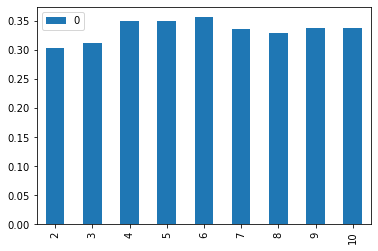

In [ ]:
pd.DataFrame(sil, index=range(2,11)).plot(kind='bar');

In [ ]:
# Create a data frame 
cluster_scores=pd.DataFrame(sil, index=range(2,11))

# Create figure
fig = px.bar(data_frame=cluster_scores,  
             x=cluster_scores.index, 
             y=cluster_scores.iloc[:, -1]
            )

# Add title and axis labels
fig.update_layout(
    yaxis_title="Silhouette Score",
    xaxis_title="# Clusters",
    title="Silhouette Score per cluster"
)

# Render
fig.show()
# fig.show(renderer="iframe") if using workspace

6. Next, we will take $K=5$ clusters. Apply the KMeans to your dataset.

In [ ]:
# Applying KMeans to the Mall dataset
X = pd.get_dummies(dataset.iloc[:,1:], drop_first=True)
kmeans = KMeans(n_clusters= 5, init= "k-means++", max_iter=300, n_init = 10, random_state=0)
y_kmeans = kmeans.fit_predict(X)

In [ ]:
y_kmeans

array([0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 3, 1, 2, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 2, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

7. Let's create a graph that will allow us to visualize each of the clusters as well as their centroids. We will first take the ```Spending Score``` as the ordinate and the ```Annual Income``` as the abscissa. 

In [ ]:
X['y_pred'] = y_kmeans

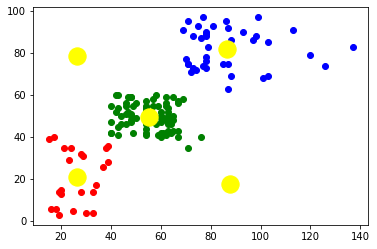

In [ ]:
plt.scatter(x=X[X['y_pred'] == 0].iloc[:,1], y=X[X['y_pred'] == 0].iloc[:,2], c='red')
plt.scatter(x=X[X['y_pred'] == 1].iloc[:,1], y=X[X['y_pred'] == 1].iloc[:,2], c='blue')
plt.scatter(x=X[X['y_pred'] == 2].iloc[:,1], y=X[X['y_pred'] == 2].iloc[:,2], c='green')

plt.scatter(kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,2], s = 300, c = 'yellow', label = 'centroids');

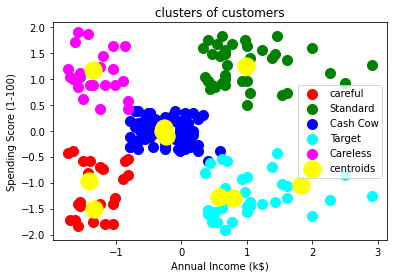

In [ ]:
# Visualizing the clusters Sur Spending Score && Annual Income

plt.scatter(X.iloc[:, 1][y_kmeans == 0], X.iloc[:, 2][y_kmeans == 0], s = 100, c = 'red', label = 'careful')
plt.scatter(X.iloc[:, 1][y_kmeans == 1], X.iloc[:, 2][y_kmeans == 1], s = 100, c = 'green', label = 'Standard')
plt.scatter(X.iloc[:, 1][y_kmeans == 2], X.iloc[:, 2][y_kmeans == 2], s = 100, c = 'blue', label = 'Cash Cow')
plt.scatter(X.iloc[:, 1][y_kmeans == 3], X.iloc[:, 2][y_kmeans == 3], s = 100, c = 'cyan', label = 'Target')
plt.scatter(X.iloc[:, 1][y_kmeans == 4], X.iloc[:, 2][y_kmeans == 4], s = 100, c = 'magenta', label = 'Careless')

plt.scatter(kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,2], s = 300, c = 'yellow', label = 'centroids')

plt.title('clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

8. We have a nice visualization with a nice cluster separation. Look this time at the variable ```Age``` in relation to the ```Spending Score```. What do you notice?

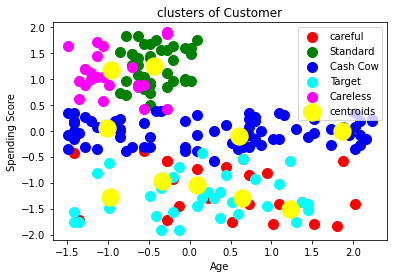

In [ ]:
# Visualizing the clusters on Age + Spending Score
plt.scatter(X.iloc[:, 0][y_kmeans == 0], X.iloc[:, 2][y_kmeans == 0], s = 100, c = 'red', label = 'careful')
plt.scatter(X.iloc[:, 0][y_kmeans == 1], X.iloc[:, 2][y_kmeans == 1], s = 100, c = 'green', label = 'Standard')
plt.scatter(X.iloc[:, 0][y_kmeans == 2], X.iloc[:, 2][y_kmeans == 2], s = 100, c = 'blue', label = 'Cash Cow')
plt.scatter(X.iloc[:, 0][y_kmeans == 3], X.iloc[:, 2][y_kmeans == 3], s = 100, c = 'cyan', label = 'Target')
plt.scatter(X.iloc[:, 0][y_kmeans == 4], X.iloc[:, 2][y_kmeans == 4], s = 100, c = 'magenta', label = 'Careless')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,2], s = 300, c = 'yellow', label = 'centroids')

plt.title('clusters of Customer')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

----> This time clusters are definitely less visible. 